# 로지스틱 회귀분석(Logistic Regression) - 분류(범주 예측)

# 1. Sigmoid Activation
> ## 1) sigmoid( ) 정의

In [1]:
import numpy as np

def sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y 

> ## 2) sigmoid( ) 실행

In [2]:
sigmoid(0)

0.5

In [3]:
sigmoid(1000000)

1.0

In [4]:
sigmoid(-1000000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.0

> ## 3) sigmoid( ) 시각화

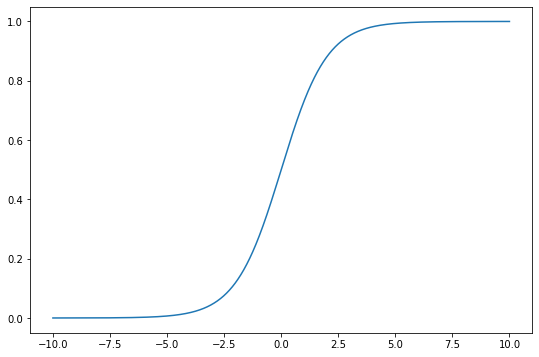

In [5]:
import matplotlib.pyplot as plt
n = np.linspace(-10.0, 10.0, 2000) # -10~10사이를 2000구간으로 나눠
plt.figure(figsize = (9, 6))
plt.plot(n, sigmoid(n))
plt.show()

# 2. Cross Entropy Error

> ## 1) Cross Entropy

- 서로 다른 사건의 확률을 곱하여 Entropy를 계산
   - y : 실제값, y_hat : 예측값(can be incorrect)
- y를 Cross-Entropy의 가중치로 적용
   - Binary Cross-Entropy Error = -y * log(y_hat) - (1 - y) * log(1 - y_hat)
      - y = 0 일 때, 뒷부분 남음
      - y = 1 일 때, 앞부분 남음
   - Categorical Cross-Entropy Error = -y * log(y_hat)

> ### (1) y = 1 vs. y_hat = 1 : 예측이 잘 됐을 때

In [6]:
y = 1
y_hat = 1

-y * np.log(y_hat)


-0.0

> ### (2) y = 1 vs. y_hat = 0.0001 : 예측이 잘 되지 않았을 때

In [7]:
y = 1
y_hat = 0.0001

-y * np.log(y_hat)

9.210340371976182

> ### (3) y = 0 vs. y_hat = 0 : 예측이 잘 됐을 때

In [8]:
y = 0
y_hat = 0

-(1 - y) * np.log(1 - y_hat)

-0.0

> ## 2) Information Theory

> ### (1) 발생 확률이 서로 다른 사건 A, B, C - Information Gain

- Information Gain(정보 이득량)
   - 자주 발생하지 않는 사건은 자주 발생하는 사건보다 전달하는 정보량이 많음
   - Information Gain(정보 이득량)은 정보의 희귀성(발생 가능성)에 반비례
   - I(x) = -log(P(x))

In [11]:
A = 0.9
B = 0.5
C = 0.1
# A, B, C는 각각 발생확률
print('%.3f' % -np.log(A), '%.3f' % -np.log(B), '%.3f' % -np.log(C))

0.105 0.693 2.303


> ### (2) AlphaGo와 Apes의 바둑대결 승리 확률 - Degree of Surprise

- Degree of Surprise(놀람의 정도)
   - 예상하기 어려운 정보에 더 높은 가치를 매기는 것

In [12]:
Alphago = 0.999
Apes = 0.001

print('%.3f' % -np.log(Alphago), '%.3f' % -np.log(Apes))
# 소수점 3자리로 계산했으니 해석할 땐 1000배 해야 한다.
# 알파고가 이길 경우, 침팬지가 이겼을 때 놀람의 정도의 1배이다. 전혀 놀랍지 않다.
# 침팬지가 이길 경우, 알파고가 이겼을 때 놀람의 정도의 6908배이다. 매우 놀랍다.

0.001 6.908


> ## 3) Entropy

- 불확실성의 정도
   - Entropy = E(-log(P(x))
- 확률변수의 평균 정보량(기댓값)
   - -sum(p(x))*log(p(x))
- 불확실성(Entropy)이 낮으면 분류정확도가 높아짐

> ### (1) 승률이 비슷한 두 팀의 Entropy

In [13]:
p1 = 0.5
p2 = 0.5

-p1 * np.log(p1) - p2 * np.log(p2)
# 어느 팀이 이길지 확실하지 않기 때문에 entropy가 높다 -> 분류 정확도가 낮음

0.6931471805599453

> ### (2) 승률 차이가 큰 두 팀의 Entropy

In [14]:
p1 = 0.999
p2 = 0.001

-p1 * np.log(p1) - p2 * np.log(p2)
# 어느 팀이 이길지 확실하기 때문에 entropy가 낮다 -> 분류 정확도가 높음

0.007907255112232087

###
# The End
###